# Kamień milowy 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display
import nltk
import warnings 

warnings.filterwarnings("ignore")

## Wczytanie ramki danych

In [5]:
allBooks = pd.read_csv("AllBooks_baseline_DTM_Unlabelled.csv").rename(columns={'# foolishness': 'foolishness'})

In [7]:
allBooks_2 = pd.read_csv("AllBooks_baseline_DTM_Labelled.csv")
allBooks_2.head()

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
allBooks.head()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
allBooks.shape

(590, 8266)

In [6]:
allBooks.describe()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.003390,0.566102,0.006780,0.001695,0.032203,0.059322,0.001695,0.001695,0.006780,0.001695,...,0.003390,0.006780,0.003390,0.001695,0.001695,0.001695,0.079661,0.008475,0.005085,0.003390
std,0.058173,1.777487,0.082129,0.041169,0.488211,0.326851,0.041169,0.041169,0.082129,0.041169,...,0.058173,0.100701,0.058173,0.041169,0.041169,0.041169,0.366824,0.091744,0.071186,0.058173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,14.000000,1.000000,1.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


## Sprawdzenie, czy w naszych danych są jakieś wartości nullowe

In [7]:
allBooks.isna().sum().sum()

0

Nie ma braków w danych.

In [8]:
allBooks.max().sort_values(ascending = False)

discerns                  47.0
mind                      43.0
body                      40.0
focused                   39.0
property                  38.0
                          ... 
comingtobe                 1.0
confesseth                 1.0
charms                     1.0
neitherpleasurenorpain     1.0
explains                   1.0
Length: 8266, dtype: float64

In [9]:
def word_cloud(x):
    if x == -1:
        x1 = allBooks.mean().sort_values(ascending = False).rename_axis('words').reset_index(name='counts')
    else:
        x1 = allBooks.loc[x].sort_values(ascending = False).rename_axis('words').reset_index(name='counts')
    d = {}
    for a, i in x1.values:
        d[a] = i

    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color="white")
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Wordcloudy:

### Dla wszystkich wierszy

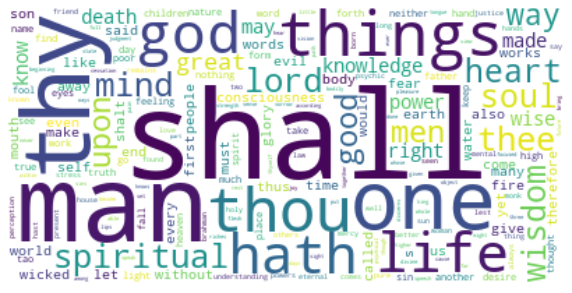

In [10]:
word_cloud(-1)

### Dla pierwszego wiersza

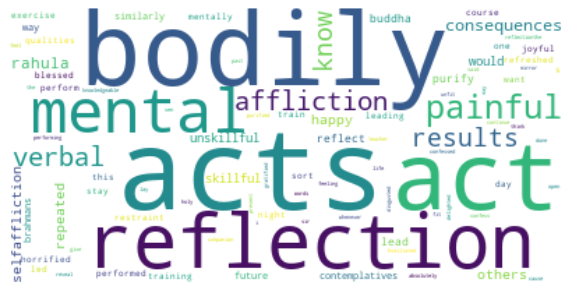

In [11]:
word_cloud(0)

### Dla drugiego wiersza

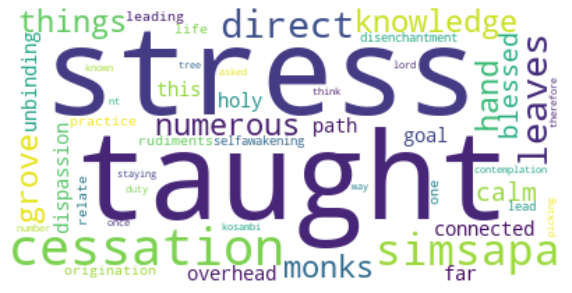

In [12]:
word_cloud(1)

## Podział wyrazów ze względu na część mowy

In [13]:
parts_of_speech = nltk.pos_tag(allBooks.columns)
parts_of_speech = pd.DataFrame(parts_of_speech, columns=['Words', 'POS'])
parts_of_speech

,Words,POS
0,foolishness,JJ
1,hath,NN
2,wholesome,NN
3,takest,NN
4,feelings,NNS
...,...,...
8261,visual,JJ
8262,thoughts,NNS
8263,illumines,NNS
8264,attire,VBP


## Sprawdzenie, czy w naszych kolumnach występują stopwordy

In [14]:
def pos(txt):
    return parts_of_speech[ parts_of_speech['POS']==txt]
title = ["coordinating conjunction",
"cardinal digit",
"determiner",
"existential there",
"preposition/subordinating",
"predeterminer",
"possessive ending",
"personal pronoun",
"possessive pronoun",
"particle",
"to",
"interjection",
"wh-determiner which",
"wh-pronoun who, what",
"possessive wh-pronoun whose",
"wh-abverb where, when"]
pos_name = ["CC", "CD", "DT", "EX", "IN",  "LS", "POS", "PRP", "PRP$", "RP", "TO", "UH", "WDT", "WP", "WP$", "WRB"]


In [15]:
for i in range(len(title)):
    print("")
    print(title[i])
    display(pos(pos_name[i]))


coordinating conjunction


,Words,POS
818,sackcloth,CC
1093,yoke,CC
1289,either,CC
6739,ye,CC



cardinal digit


,Words,POS
681,nine,CD
1363,two,CD
3941,five,CD
4956,six,CD
5700,three,CD
5749,thousand,CD
5973,eight,CD
6727,seven,CD
7246,one,CD
7579,four,CD



determiner


,Words,POS
37,neither,DT
3727,all,DT
4491,another,DT
4708,tooth,DT
5345,this,DT
6861,the,DT
7988,every,DT
8113,hall,DT



existential there


,Words,POS
1829,bodysphere,EX



preposition/subordinating


,Words,POS
188,although,IN
212,abuse,IN
732,for,IN
795,observer,IN
875,accord,IN
...,...,...
7734,per,IN
7809,unsound,IN
7832,abound,IN
8108,pot,IN



predeterminer


,Words,POS



possessive ending


,Words,POS



personal pronoun


,Words,POS
1224,we,PRP
1739,us,PRP
2035,thyself,PRP
4054,he,PRP
6509,oneself,PRP
7863,notself,PRP



possessive pronoun


,Words,POS



particle


,Words,POS
404,out,RP
1940,overlook,RP
2213,offendeth,RP
3437,overthrew,RP
5980,abateth,RP
8008,obscureth,RP



to


,Words,POS



interjection


,Words,POS
5276,yes,UH



wh-determiner which


,Words,POS
1838,whatever,WDT



wh-pronoun who, what


,Words,POS
782,mahat,WP
1482,who,WP
3739,weigheth,WP
5191,whoever,WP



possessive wh-pronoun whose


,Words,POS
3023,whose,WP$



wh-abverb where, when


,Words,POS
2725,whomsoever,WRB
7363,whereby,WRB
7982,whenever,WRB


## Obliczenie liczby słów w każdym rozdziale.

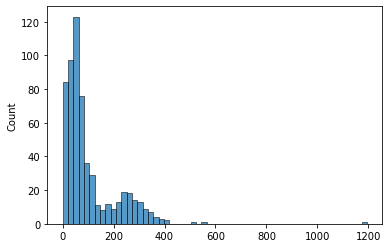

In [16]:
number_of_words = allBooks.sum(axis=1)
sns.histplot(number_of_words);

## Obliczenie liczby liter w każdym rozdziale.

In [17]:
letter_count = allBooks.copy()

for word in letter_count.columns:
    letter_count[word] *= len(word)

number_of_letters = letter_count.sum(axis=1)
number_of_letters.head(10)

0    1949.0
1     700.0
2    1177.0
3     859.0
4     130.0
5    1774.0
6    1618.0
7     747.0
8     804.0
9     253.0
dtype: float64

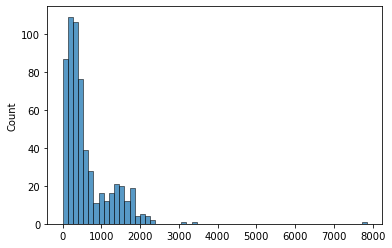

In [18]:
sns.histplot(number_of_letters);

## Obliczenie średniej długości słowa w każdym rozdziale.

In [19]:
average_word_length = number_of_letters / number_of_words
average_word_length.head(10)

0    6.540268
1    6.542056
2    6.260638
3    6.658915
4    8.666667
5    7.270492
6    7.159292
7    8.393258
8    7.309091
9    8.433333
dtype: float64

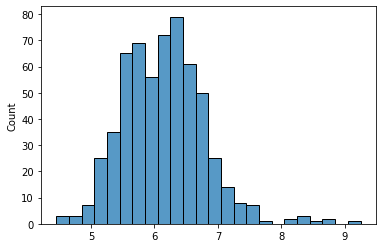

In [20]:
sns.histplot(average_word_length);

## Wnioski:


* Nasza ramka danych zawiera wyrazy ze wspólnej rodziny. Będzie trzeba dokonać lematyzacji
* W tekstach występują liczne stopwordy, będziemy chcieli się ich pozbyć w celu efektywniejszej klasteryzacji